#                   Capstone Project 1: Employer Ratings Analysis

# Exploratory Data Analysis
Now it's time to make some inferences from our data.

In [1]:
# Import packages and read the cleaned csv file into a pandas DataFrame.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
emp_df = pd.read_csv('employee_cleaned.csv')

In [2]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 18 columns):
Unnamed: 0                    67529 non-null int64
Unnamed: 0.1                  67529 non-null int64
company                       67529 non-null object
location                      42444 non-null object
dates                         67525 non-null object
job_title                     67529 non-null object
summary                       67393 non-null object
pros                          67529 non-null object
cons                          67528 non-null object
advice_to_mgmt                37693 non-null object
overall_ratings               67529 non-null float64
work_balance_stars            60369 non-null float64
culture_values_stars          53983 non-null float64
career_opportunities_stars    60421 non-null float64
comp_benefit_stars            60368 non-null float64
senior_management_stars       59754 non-null float64
helpful_count                 67529 non-null int64
link

In [3]:
emp_df['dates'] = pd.to_datetime(emp_df['dates'], errors='coerce')
emp_df['year'] = emp_df.dates.dt.to_period('Y')
emp_df.describe()

,Unnamed: 0,Unnamed: 0.1,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,helpful_count
count,67529.000000,67529.000000,67529.000000,60369.000000,53983.000000,60421.000000,60368.000000,59754.000000,67529.000000
mean,33764.000000,33765.000000,3.826075,3.373254,3.784451,3.634035,3.942503,3.322522,1.268211
std,19494.087501,19494.087501,1.154989,1.299901,1.296220,1.225787,1.038597,1.312449,16.085852
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16882.000000,16883.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,33764.000000,33765.000000,4.000000,3.500000,4.000000,4.000000,4.000000,3.000000,0.000000
75%,50646.000000,50647.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,1.000000
max,67528.000000,67529.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2094.000000


In [4]:
emp_df.head(2)

,Unnamed: 0,Unnamed: 0.1,company,location,dates,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,helpful_count,link,year
0,33764,33765,amazon,Chennai (India),2012-03-29,Former Employee - Anonymous Employee,Exp Review,great place to work for women very comfortable...,"you should be self-motivated, in order to grow...",NaN,5.0,4.5,NaN,3.5,5.0,2.5,0,https://www.glassdoor.com/Reviews/Amazon-Revie...,2012
1,22841,22842,amazon,"Charleston, TN",2014-12-30,Former Employee - Warehouse,"Great job for mindless zombies, or someone in ...","pay was only about $11.00 an hour, so absolute...","Everything: long hours, horrible schedules, ve...","Be nice, floor workers are tired of your BS.",2.0,1.0,1.0,1.0,2.0,1.0,3,https://www.glassdoor.com/Reviews/Amazon-Revie...,2014


In [5]:
emp_df['overall_ratings'].unique()

array([5., 2., 4., 3., 1.])

Next, we will check for missing values in all the columns.

In [6]:
emp_df.isnull().sum()

Unnamed: 0                        0
Unnamed: 0.1                      0
company                           0
location                      25085
dates                             4
job_title                         0
summary                         136
pros                              0
cons                              1
advice_to_mgmt                29836
overall_ratings                   0
work_balance_stars             7160
culture_values_stars          13546
career_opportunities_stars     7108
comp_benefit_stars             7161
senior_management_stars        7775
helpful_count                     0
link                              0
year                              4
dtype: int64

In [7]:
emp_df['location'].unique()

array(['Chennai (India)', 'Charleston, TN', 'Seattle, WA', ...,
       'Norcross, GA', 'Sartrouville (France)', 'Gilroy, CA'],
      dtype=object)

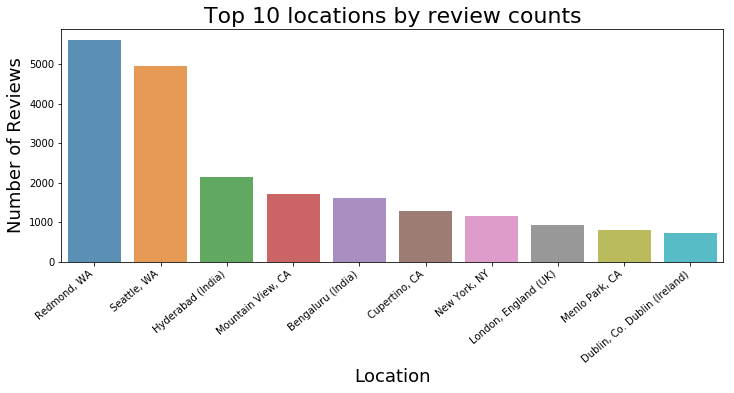

In [8]:
location_count = emp_df['location'].value_counts()
location_count = location_count[:10,]
plt.figure(figsize=(10,5))
ax = sns.barplot(location_count.index, location_count.values, alpha=0.8)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax = plt.tight_layout()
ax = plt.title('Top 10 locations by review counts', fontsize=22)
ax = plt.ylabel('Number of Reviews', fontsize=18)
ax = plt.xlabel('Location', fontsize=18)
plt.show()

In [9]:
print('Missing location on', emp_df['location'].isnull().sum(), 'records')

Missing location on 25085 records


In [10]:
print(emp_df['culture_values_stars'].isnull().sum()/emp_df.shape[0]*100, '% missing values for culture_values_stars')

20.05952997971242 % missing values for culture_values_stars


More than 35% of the rows have missing location and about 20% have missing values in culture_values_stars. Therefore we will not be using these two columns for any of our analysis. So let's go ahead and drop the unnecessary columns from the dataframe and make a copy of it for future use.

In [11]:
emp_df.drop(['Unnamed: 0','Unnamed: 0.1','location','culture_values_stars','link','helpful_count'],
          axis='columns',
          inplace=True)

In [12]:
copy_emp_df = emp_df
copy_emp_df.head()

,company,dates,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,year
0,amazon,2012-03-29,Former Employee - Anonymous Employee,Exp Review,great place to work for women very comfortable...,"you should be self-motivated, in order to grow...",NaN,5.0,4.5,3.5,5.0,2.5,2012
1,amazon,2014-12-30,Former Employee - Warehouse,"Great job for mindless zombies, or someone in ...","pay was only about $11.00 an hour, so absolute...","Everything: long hours, horrible schedules, ve...","Be nice, floor workers are tired of your BS.",2.0,1.0,1.0,2.0,1.0,2014
2,amazon,2014-12-23,Current Employee - Software Development Engineer,Good place to work right out of school,"You learn a lot in a short time period here, a...",Expectations of how much you should work seem ...,Train your dev managers better. I have yet to ...,4.0,3.0,4.0,4.0,4.0,2014
3,amazon,2014-12-25,Current Employee - Anonymous Employee,Good job,Good pay and friendly environment,Long hard hours and short breaks,Nothing,4.0,2.0,5.0,4.0,3.0,2014
4,amazon,2015-01-06,Former Employee - Anonymous Employee,Its an ok job,The work hers were good ands a lot of the ther...,The only way to get promoted or extra training...,NaN,2.0,5.0,3.0,4.0,3.0,2015


In [13]:
ind_columns = ["company", "dates", "overall_ratings", "work_balance_stars", "career_opportunities_stars",
               "comp_benefit_stars", "senior_management_stars", "year"]
#emp_df.set_index(["company", "location"], inplace=True, drop=False, verify_integrity=False)
emp_df = emp_df.reindex(columns = ind_columns)
emp_df.head(2)

,company,dates,overall_ratings,work_balance_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,year
0,amazon,2012-03-29,5.0,4.5,3.5,5.0,2.5,2012
1,amazon,2014-12-30,2.0,1.0,1.0,2.0,1.0,2014


The other ratings columns have less than 10% rows with missing values, which will be filled with either the mean or the median of those columns.

In [14]:
print(emp_df.work_balance_stars.mean(), emp_df.work_balance_stars.median())
print(emp_df.career_opportunities_stars.mean(), emp_df.career_opportunities_stars.median())
print(emp_df.comp_benefit_stars.mean(), emp_df.comp_benefit_stars.median())
print(emp_df.senior_management_stars.mean(), emp_df.senior_management_stars.median())

3.373254484917756 3.5
3.6340345244203176 4.0
3.942502650410814 4.0
3.3225223416005623 3.0


The mean and median for these 4 predictor variables are close so we will fill the missing values with the mean.

In [15]:
wbs_mean = emp_df['work_balance_stars'].mean()
emp_df['work_balance_stars'] = emp_df['work_balance_stars'].fillna(value=wbs_mean)

cos_mean = emp_df['career_opportunities_stars'].mean()
emp_df['career_opportunities_stars'] = emp_df['career_opportunities_stars'].fillna(value=cos_mean)

cbs_mean = emp_df['comp_benefit_stars'].mean()
emp_df['comp_benefit_stars'] = emp_df['comp_benefit_stars'].fillna(value=cbs_mean)

sms_mean = emp_df['senior_management_stars'].mean()
emp_df['senior_management_stars'] = emp_df['senior_management_stars'].fillna(value=sms_mean)

In [16]:
emp_df['senior_management_stars'].unique()

array([2.5       , 1.        , 4.        , 3.        , 2.        ,
       3.32252234, 5.        , 4.5       , 1.5       , 3.5       ])

The dataset is rich and interesting and can be used to answer a lot of other questions such as:
1.	Do current employees give more reviews than the ex-employees?
2.	Is there a trend between the number of reviews and dates?
3.	Were there a high number of reviews on a particular day?
4.	What is the average overall rating? Which companies have consistently continued to stay above this average?
5.  Which variables are the biggest predictor for the target variable (overall_ratings)?

# What is the main question for this project?

What are the various factors that influence the overall_ratings review an employee gives to their ex- or current employer?

# Are there variables that are particularly significant in terms of explaining the answer to your project question?

In the dataset, we have many variables that could be significant in how an employee rates his employer. Right now, we will just focus on the variables that have a numerical value for the rating. These variables are: work_balance_stars, career_opportunities_stars, comp_benefit_stars and senior_management_stars. All the other features have been removed from the dataframe.

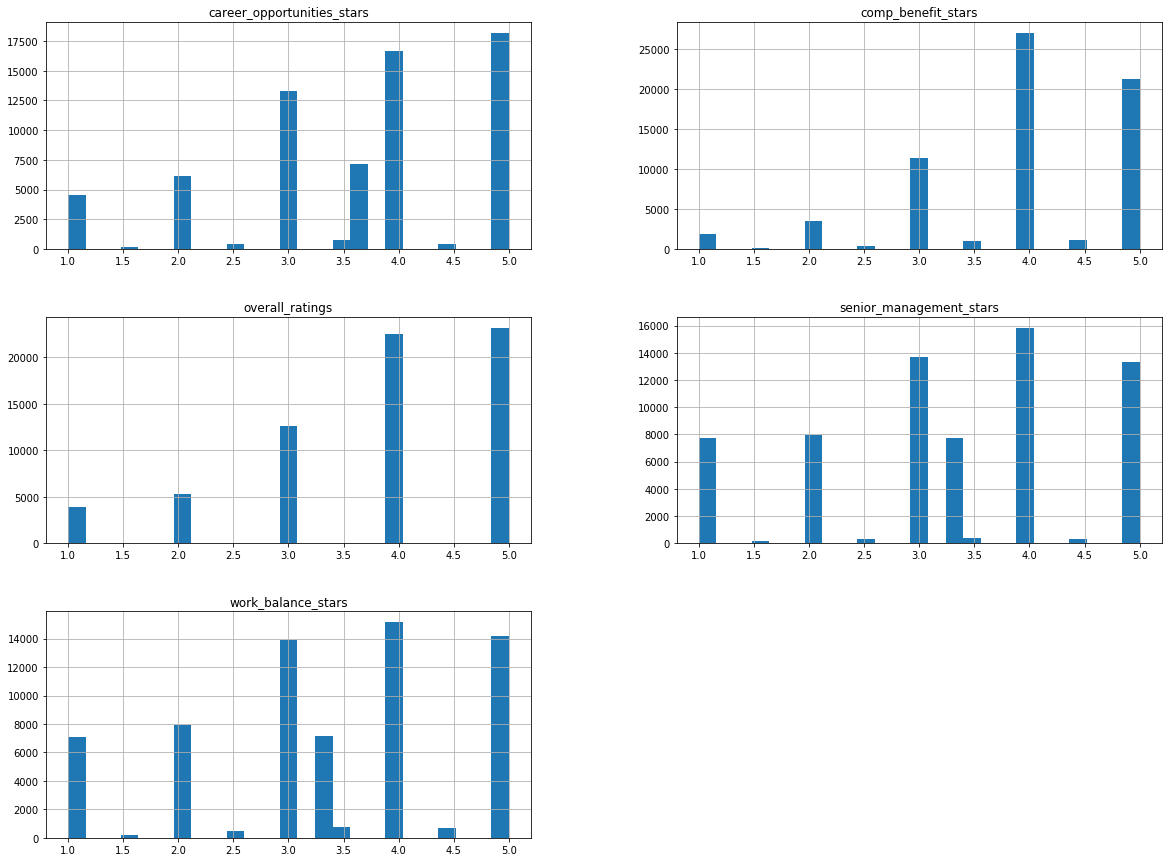

In [17]:
# Create histograms for all numerical columns, set number of bins and size
emp_df.hist(bins=25, figsize=(20,15))

# Show plot
plt.show()

# Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

In [18]:
corr_matrix = emp_df.corr()
corr_matrix['overall_ratings'].sort_values(ascending=False)

overall_ratings               1.000000
senior_management_stars       0.688452
career_opportunities_stars    0.659956
work_balance_stars            0.580291
comp_benefit_stars            0.512315
Name: overall_ratings, dtype: float64

In [19]:
print('Correlation between work_balance_stars and overall_ratings: ', emp_df['work_balance_stars'].corr(emp_df['overall_ratings']))
print('Correlation between comp_benefit_stars and overall_ratings: ', emp_df['comp_benefit_stars'].corr(emp_df['overall_ratings']))
print('Correlation between career_opportunities_stars and overall_ratings: ', emp_df['career_opportunities_stars'].corr(emp_df['overall_ratings']))
print('Correlation between senior_management_stars and overall_ratings: ', emp_df['senior_management_stars'].corr(emp_df['overall_ratings']))

Correlation between work_balance_stars and overall_ratings:  0.5802912944411607
Correlation between comp_benefit_stars and overall_ratings:  0.5123151647565627
Correlation between career_opportunities_stars and overall_ratings:  0.6599561796214779
Correlation between senior_management_stars and overall_ratings:  0.6884520727835641


The variables work_balance_stars and comp_benefit_stars both have a moderate positive relation with overall_ratings. 
On the other hand, career_opportunities_stars and senior_management_stars both have a strong positive relation with overall_ratings. We can plot a scatter plot to confirm this.

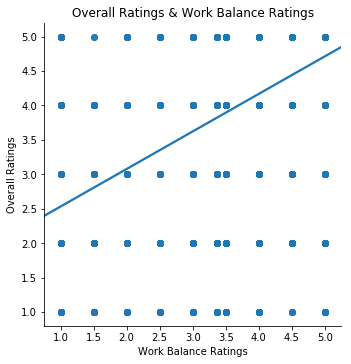

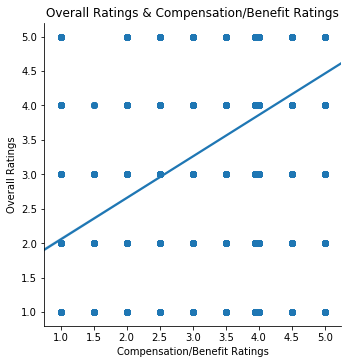

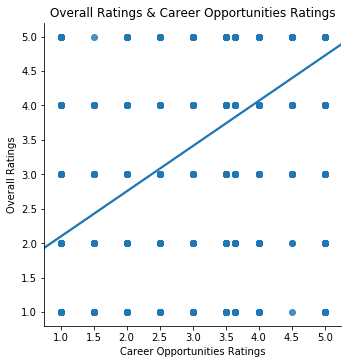

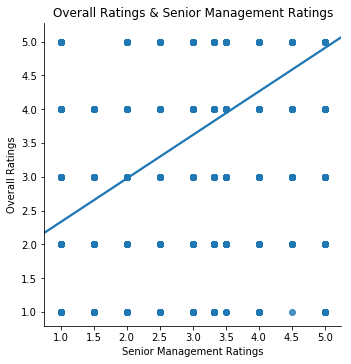

In [22]:
ax = sns.lmplot(x="work_balance_stars", y="overall_ratings", data=emp_df)
ax = ax.set_axis_labels("Work Balance Ratings", "Overall Ratings")
ax = ax.set(title="Overall Ratings & Work Balance Ratings")

ax = sns.lmplot(x="comp_benefit_stars", y="overall_ratings", data=emp_df)
ax = ax.set_axis_labels("Compensation/Benefit Ratings", "Overall Ratings")
ax = ax.set(title="Overall Ratings & Compensation/Benefit Ratings")

ax = sns.lmplot(x="career_opportunities_stars", y="overall_ratings", data=emp_df)
ax = ax.set_axis_labels("Career Opportunities Ratings", "Overall Ratings")
ax = ax.set(title="Overall Ratings & Career Opportunities Ratings")

ax = sns.lmplot(x="senior_management_stars", y="overall_ratings", data=emp_df)
ax = ax.set_axis_labels("Senior Management Ratings", "Overall Ratings")
ax = ax.set(title="Overall Ratings & Senior Management Ratings")
plt.show()

From the above four charts, we can see that our four predictor variables have a linear and positive relationship with overall_ratings.

Typically employees are most happy when they receive good career growth opportunities within their organization. And such opportunities are usually provided by the senior management. So let's check the correlation between career_opportunities_stars and senior_management_stars and see if we can prove our theory.

In [23]:
print('Correlation between career_opportunities_stars and senior_management_stars: ', emp_df['career_opportunities_stars'].corr(emp_df['senior_management_stars']))
print('Correlation between work_balance_stars and comp_benefit_stars: ', emp_df['work_balance_stars'].corr(emp_df['comp_benefit_stars']))

Correlation between career_opportunities_stars and senior_management_stars:  0.6247170550232829
Correlation between work_balance_stars and comp_benefit_stars:  0.41462863313167897


So we see here that the correlation between career_opportunities_stars and senior_management_stars is strong.
The correlation between work_balance_stars and comp_benefit_stars is moderate. 

# What are the most appropriate tests to use to analyse these relationships?

The Pearson correlation test assumes that the variables are normally distributed whereas the Spearman Correlation does not assume that the datasets are normally distributed. Let's run both tests on our variables.

In [24]:
print('Pearson Correlation: ', stats.pearsonr(emp_df.career_opportunities_stars, emp_df.senior_management_stars))
print(stats.spearmanr(emp_df.career_opportunities_stars, emp_df.senior_management_stars))

Pearson Correlation:  (0.6247170550232822, 0.0)
SpearmanrResult(correlation=0.6005304026661672, pvalue=0.0)


In [25]:
print('Pearson Correlation: ', stats.pearsonr(emp_df.work_balance_stars, emp_df.comp_benefit_stars))
print(stats.spearmanr(emp_df.work_balance_stars, emp_df.comp_benefit_stars))

Pearson Correlation:  (0.41462863313167836, 0.0)
SpearmanrResult(correlation=0.3865441526194612, pvalue=0.0)


In [26]:
# Pick columns to check
x = emp_df['overall_ratings']
y1 = emp_df['senior_management_stars']
y2 = emp_df['career_opportunities_stars']
y3 = emp_df['work_balance_stars']
y4 = emp_df['comp_benefit_stars']

# Scipy's Paerson function returns the correlation and the p-value
print(stats.pearsonr(x, y1))
print(stats.pearsonr(x, y2))
print(stats.pearsonr(x, y3))
print(stats.pearsonr(x, y4))

(0.688452072783564, 0.0)
(0.6599561796214771, 0.0)
(0.5802912944411611, 0.0)
(0.5123151647565624, 0.0)


Our null hypotheses is the variables are independent and alternative hypotheses is they are not independent but correlated.
The Pearson correlation between overall_ratings and the predictor variables reports a p-value of 0.0 which indicates that we can reject the null hypotheses and accept the alternative hypotheses that there is a correlation.

Another test that can tried is the chi-square test.

In [27]:
# Tabulate work_balance_stars and overall_ratings
wbs_overall = pd.crosstab(index=emp_df['work_balance_stars'],columns=emp_df['overall_ratings'])
wbs_overall.head()

overall_ratings,1.0,2.0,3.0,4.0,5.0
work_balance_stars,,,,,
1.0,2431,1800,1779,781,266
1.5,30,78,47,18,2
2.0,476,1290,2785,2526,821
2.5,34,137,176,97,13
3.0,388,870,3565,5787,3304


In [28]:
# Test relationship between work_balance_stars and overall_ratings
wbs_overall_chisq = stats.chi2_contingency(wbs_overall)

# Output: (chi square test statistic, p, degrees of freedom)
wbs_overall_chisq[:3]

(32671.080790591095, 0.0, 36)

In [29]:
# Tabulate senior_management_stars and overall_ratings
sms_overall = pd.crosstab(index=emp_df['senior_management_stars'],columns=emp_df['overall_ratings'])

# Test relationship between senior_management_stars and overall_ratings
sms_overall_chisq = stats.chi2_contingency(sms_overall)

# Output: (chi square test statistic, p, degrees of freedom)
sms_overall_chisq[:3]

(49902.95075246505, 0.0, 36)

This test also gives us a p-value of 0.0 which is less than 0.05. Hence we reject the null hypotheses and deduce that the variables are correlated.

In [30]:
apple_df = emp_df[emp_df.company == 'apple']
amazon_df = emp_df[emp_df.company == 'amazon']
facebook_df = emp_df[emp_df.company == 'facebook']
google_df = emp_df[emp_df.company == 'google']
microsoft_ds = emp_df[emp_df.company == 'microsoft']
netflix_df = emp_df[emp_df.company == 'netflix']

In [31]:
emp_df.groupby('company')['overall_ratings'].describe()

,count,mean,std,min,25%,50%,75%,max
company,,,,,,,,
amazon,26430.0,3.587363,1.257311,1.0,3.0,4.0,5.0,5.0
apple,12950.0,3.958224,1.064032,1.0,3.0,4.0,5.0,5.0
facebook,1590.0,4.511950,0.955680,1.0,4.0,5.0,5.0,5.0
google,7819.0,4.339430,0.920695,1.0,4.0,5.0,5.0,5.0
microsoft,17930.0,3.816564,1.036499,1.0,3.0,4.0,5.0,5.0
netflix,810.0,3.411111,1.415131,1.0,2.0,4.0,5.0,5.0


In [32]:
emp_df.groupby('company')['year'].describe()

,count,unique,top,freq
company,,,,
amazon,26428,11,2018,8054
apple,12949,11,2016,2562
facebook,1590,11,2017,324
google,7819,11,2017,1490
microsoft,17930,11,2015,3011
netflix,809,11,2015,104


In [34]:
#emp_df.groupby(['company','year'])['overall_ratings'].describe()

In [35]:
# function to get the Margin of Error of the mean
def get_mem(sample, alpha=0.95, dof=1):
    """ This function takes a series as input.
    It also optionally takes a significance level
    and degrees of freedom as input.
    This function returns the margin of error
    for the mean of the input series."""
    
    # find the number of non-null values
    sample_count = np.count_nonzero(~np.isnan(sample))
    
    # find the mean and standard error of the mean
    mean = np.nanmean(sample)
    sem = np.nanstd(sample, ddof=dof) / np.sqrt(sample_count)
    
    # get the confidence interval
    cim = stats.norm.interval(alpha, loc=mean, scale=sem)
    
    # calculate and return the margin of error
    mem = (cim[1] - cim[0]) / 2
    return mem

In [36]:
# get mean and SE of the mean for each station
df_mem = emp_df[['career_opportunities_stars', 'senior_management_stars', 'work_balance_stars', 'comp_benefit_stars']].groupby(emp_df.company).agg([np.nanmean, get_mem])

In [37]:
df_mem

career_opportunities_stars           senior_management_stars  \
                             nanmean   get_mem                 nanmean   
company                                                                  
amazon                      3.607071  0.014944                3.191030   
apple                       3.438122  0.020292                3.448864   
facebook                    4.338216  0.048876                4.239023   
google                      3.907707  0.022553                3.755193   
microsoft                   3.657593  0.015026                3.160415   
netflix                     3.100459  0.094168                3.205850   

                    work_balance_stars           comp_benefit_stars            
            get_mem            nanmean   get_mem            nanmean   get_mem  
company                                                                        
amazon     0.015420           3.052557  0.015336           3.721170  0.012985  
apple      0.021292           3.367992  0.021082           4.014815  0.016489  
facebook   0.053474           3.914501  0.056195           4.544816  0.036556  
google     0.023120           3.893909  0.022847           4.305022  0.017918  
microsoft  0.016896           3.579517  0.016197           3.997241  0.012359  
netflix    0.099237           3.267485  0.091479           4.114969  0.067402

In [38]:
df_cos = df_mem['career_opportunities_stars']
df_cos.columns = ['sample_mean','mem']
df_cos = df_cos.sort_values('sample_mean').reset_index()

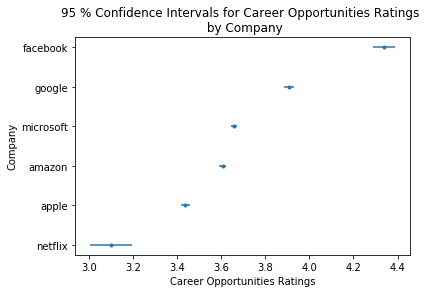

In [39]:
# plot the CI for career opportunities stars
plt.errorbar(x=df_cos.sample_mean, y=df_cos.index, xerr=df_cos.mem, marker='.', linestyle='none')
plt.yticks(df_cos.index, df_cos.company)
plt.xlabel('Career Opportunities Ratings')
plt.ylabel('Company')
plt.title('95 % Confidence Intervals for Career Opportunities Ratings \n by Company')
plt.show()

In [40]:
apple_by_year = apple_df.groupby(['year']).mean()
apple_df_min = apple_by_year['overall_ratings'].min()
apple_df_max = apple_by_year['overall_ratings'].max()

In [41]:
amazon_by_year = amazon_df.groupby(['year']).mean()
amazon_df_min = amazon_by_year['overall_ratings'].min()
amazon_df_max = amazon_by_year['overall_ratings'].max()

<< PENDING >>
Something I am still working on ... Find the min and max means grouped by company and year of review and plot on a bar graph.

Conclusion:
All the ratings variables are correlated and show as pattern. Further analysis should be done using regression models and F-tests. I think it will be interesting to also analyze the summary, pros, cons and advice_to_mgmt columns. They contain textual data and I would like to use NLP techniques to conduct text processing and sentiment analysis on them.